In [45]:
import os
import pandas as pd

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [154]:
filename_curso = os.path.join('datasets', 'DM_CURSO.csv')
filename_ies = os.path.join('datasets', 'DM_IES.csv')
filename_municipio = os.path.join('datasets', 'MUNICIPIO.csv')
filename_uf = os.path.join('datasets', 'ESTADOS.csv')
# pd.Int64Dtype()
# foi utilizado pois o pandas converteu os valores inteiros do csv para float e alguns campos apresentaram valores 'NaN'.
# com isso, não foi possível converte-lo para inteiro. Após a execução do comando, os valores NaN foram ignorados e o fillna definiu o valor para 0.
df_curso = pd.read_csv(filename_curso, sep='|', dtype={'CO_IES': pd.Int64Dtype(), 'CO_MUNICIPIO': pd.Int64Dtype(), 'CO_UF': pd.Int64Dtype(), 'IN_INTEGRAL': pd.Int64Dtype(), 'IN_MATUTINO': pd.Int64Dtype(), 'IN_VESPERTINO': pd.Int64Dtype(), 'IN_NOTURNO': pd.Int64Dtype()}, encoding = "latin1", usecols=['CO_IES', 'CO_CURSO', 'NO_CURSO', 'CO_MUNICIPIO', 'CO_UF', 'IN_INTEGRAL', 'IN_MATUTINO', 'IN_VESPERTINO', 'IN_NOTURNO', 'QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL', 'QT_VAGA_TOTAL', 'QT_INSCRITO_TOTAL'])
df_curso.fillna(0, inplace=True)


df_ies = pd.read_csv(filename_ies, sep='|', dtype={'CO_IES': pd.Int64Dtype()}, usecols=['CO_IES', 'NO_IES'], encoding = "latin1")
df_municipio = pd.read_csv(filename_municipio, sep='|', dtype={'COD_MUNI': pd.Int64Dtype(), 'COD_UF': pd.Int64Dtype()}, usecols=['COD_MUNI', 'COD_UF', 'NOME_MUNI'], encoding = "latin1")
df_uf = pd.read_csv(filename_uf, sep='|', dtype={'codigo_uf': pd.Int64Dtype()}, usecols=['codigo_uf', 'nome'], encoding = "latin1")

df_curso_ies = df_curso.merge(df_ies, left_on='CO_IES', right_on='CO_IES', how='outer')
df_curso_ies_municipio = df_curso_ies.merge(df_municipio, left_on='CO_MUNICIPIO', right_on='COD_MUNI', how='outer')

df = df_curso_ies_municipio.merge(df_uf, left_on='CO_UF', right_on='codigo_uf', how='outer')

In [155]:
df.shape

(42699, 19)

In [195]:
df.head(10)

,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,NO_CURSO,IN_INTEGRAL,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL,NO_IES,COD_MUNI,NOME_MUNI,COD_UF,codigo_uf,nome
0,1,51,5103403,1.0,DIREITO,0,1,0,1,445.0,76.0,95.0,3144.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
1,1,51,5103403,2.0,CIÊNCIAS ECONÔMICAS,0,1,0,1,344.0,38.0,121.0,945.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
2,1,51,5103403,3.0,ENGENHARIA CIVIL,1,0,0,0,266.0,34.0,55.0,637.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
3,1,51,5103403,6.0,PEDAGOGIA,0,1,1,0,326.0,49.0,100.0,1461.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
4,1,51,5103403,7.0,SERVIÇO SOCIAL,0,1,0,0,253.0,23.0,83.0,1449.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
5,1,51,5103403,8.0,CIÊNCIAS CONTÁBEIS,0,1,0,1,321.0,59.0,86.0,1410.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
6,1,51,5103403,9.0,AGRONOMIA,1,0,0,0,388.0,49.0,86.0,969.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
7,1,51,5103403,10.0,ENGENHARIA FLORESTAL,1,0,0,0,372.0,40.0,86.0,659.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
8,1,51,5103403,12.0,MEDICINA,1,0,0,0,496.0,81.0,81.0,2806.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso
9,1,51,5103403,13.0,ADMINISTRAÇÃO,0,1,0,1,458.0,75.0,126.0,2285.0,UNIVERSIDADE FEDERAL DE MATO GROSSO,5103403,Cuiabá,51,51,Mato Grosso


In [115]:
df.describe()

,CO_IES,CO_UF,CO_MUNICIPIO,CO_CURSO,IN_INTEGRAL,IN_MATUTINO,IN_VESPERTINO,IN_NOTURNO,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
count,38256.000000,38256.000000,3.825600e+04,3.825600e+04,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000,38256.000000
mean,2522.858558,30.860806,3.102285e+06,7.173713e+05,0.144317,0.365668,0.078785,0.735597,220.926077,33.060905,353.763593,450.008025
std,4235.430785,13.002170,1.304376e+06,8.959026e+05,0.351416,0.481623,0.269406,0.441021,882.235627,145.884333,2118.890658,1826.534925
min,1.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,417.000000,26.000000,2.607208e+06,6.487600e+04,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,60.000000,46.000000
50%,1042.000000,33.000000,3.304557e+06,1.214000e+05,0.000000,0.000000,0.000000,1.000000,111.000000,14.000000,115.000000,141.000000
75%,2497.000000,41.000000,4.104808e+06,1.264864e+06,0.000000,1.000000,0.000000,1.000000,228.000000,35.000000,235.000000,392.000000
max,23705.000000,53.000000,5.300108e+06,5.001466e+06,1.000000,1.000000,1.000000,1.000000,74216.000000,12012.000000,111766.000000,152168.000000


**Resultados**
---------------

Quais são os 10 cursos que possuem mais instituições de ensino em 2018?


NO_CURSO
ADMINISTRAÇÃO                 2254
PEDAGOGIA                     1714
CIÊNCIAS CONTÁBEIS            1485
EDUCAÇÃO FÍSICA               1415
DIREITO                       1302
ENGENHARIA CIVIL              1077
ENFERMAGEM                    1055
CIÊNCIAS BIOLÓGICAS            884
GESTÃO DE RECURSOS HUMANOS     860
ENGENHARIA DE PRODUÇÃO         836
dtype: int64

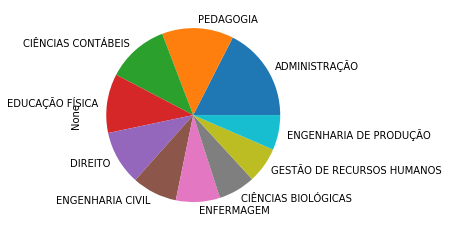

In [281]:
dfx = df[['NO_CURSO', 'NO_IES']].groupby(['NO_CURSO']).size().sort_values(ascending=False)
dfx.head(10).plot(kind='pie')

dfx = df[['NO_CURSO', 'NO_IES']].groupby(['NO_CURSO']).size().sort_values(ascending=False)
dfx.head(10)

Qual o municipio que tem mais procura por Ensino Superior?

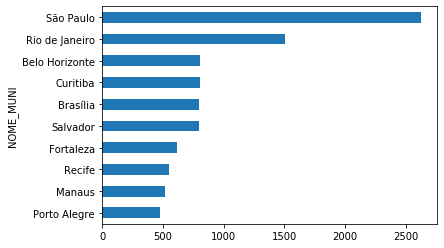

In [278]:
df.query('CO_MUNICIPIO != 0').groupby('NOME_MUNI').size().sort_values().tail(10).plot(kind='barh')

Qual a média de matriculas feitas por cada Estado?

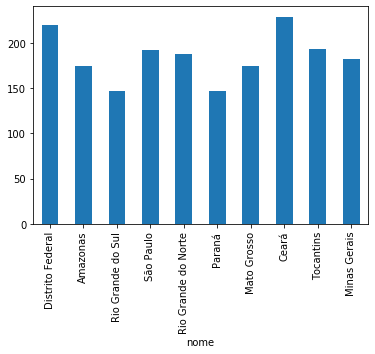

In [313]:
query = df.query('CO_UF != 0').groupby('nome')['QT_MATRICULA_TOTAL'].mean()
query.sample(10).plot(kind='bar')

In [317]:
query = df.query('CO_UF != 0').groupby('nome')['QT_MATRICULA_TOTAL'].mean()
query.sample(10)

nome
Santa Catarina       147.879973
Amapá                205.256098
Ceará                229.144177
Minas Gerais         181.821138
São Paulo            191.997618
Rio Grande do Sul    147.325355
Rio de Janeiro       208.149408
Tocantins            193.748148
Goiás                166.399675
Amazonas             174.922687
Name: QT_MATRICULA_TOTAL, dtype: float64

Qual a média de concluintes por Estado/Curso?

In [190]:
query = df.query('CO_UF != 0 & CO_MUNICIPIO != 0').groupby(['nome', 'NO_CURSO'])['QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL'].mean().sort_values('QT_MATRICULA_TOTAL')
query.sample(30)

,,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
nome,NO_CURSO,,
Santa Catarina,ENGENHARIA MECÂNICA,187.088235,21.529412
Minas Gerais,ABI - TEATRO,56.500000,0.000000
Rio de Janeiro,CIÊNCIAS AMBIENTAIS,244.000000,20.000000
Goiás,ENGENHARIA DE TRANSPORTES,100.500000,3.500000
Rio de Janeiro,ABI - LETRAS - PORTUGUÊS - ITALIANO,48.000000,0.000000
Ceará,ELETROTÉCNICA INDUSTRIAL,48.000000,0.000000
Maranhão,CIÊNCIAS NATURAIS - QUÍMICA,349.000000,12.000000
Roraima,MATEMÁTICA,74.500000,5.500000
Bahia,ARTES DO CORPO EM CENA,5.000000,0.000000
